# Logistic Regression

## Gradient Descent

The hypothesis function of logistic regression is defined as follows:

$$h_{\theta}(x) = \dfrac{1}{1+e^{\theta^{T}x}}$$

The cost function we will be using is the *log likelihood*. The goal is to **maximize** this value, so the implementation will be a gradient *ascent*.

$$l(\theta) = \sum_{x \in X}y\ ln(h_{\theta}(x))+(1-y)\ ln(1-h_{\theta}(x))$$

The gradient and update step is as follows:

$$\theta_{j}(k+1) = \theta_{j}(k)+\alpha \sum_{i=1}^{M}(y^{(i)}-h_{\theta}(x^{(i)}))x_j$$

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Create a toy dataset
X1, y1 = make_classification(n_samples=100,
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_classes=2, 
                           random_state=0)

In [3]:
data1 = pd.DataFrame(np.vstack((y1, X1.T)).T, columns=['Target', 'Feat1', 'Feat2'])
data1.head()

,Target,Feat1,Feat2
0,0,-0.766055,0.183325
1,0,-0.920383,-0.072317
2,0,-0.986585,-0.286920
3,1,1.709102,-1.104540
4,1,1.987647,1.776245


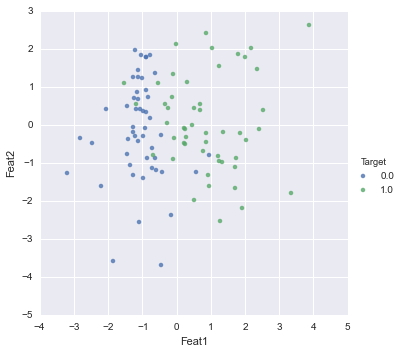

In [4]:
sns.lmplot(x="Feat1", y="Feat2", hue="Target", data=data1, fit_reg= False, markers='o');

In [5]:
# Import home-made logistic regression function
from logistic_regression_functions import *
from gradient_ascent import GradientAscent

In [6]:
#save cost, gradient and prediction functions
# cost = log_likelihood
# gradient = log_likelihood_gradient
cost = reg_log_likelihood
gradient = reg_log_likelihood_gradient
predict_func = predict

In [7]:
# Instantiate and run model on data
model1 = GradientAscent(cost, gradient, predict_func, fit_intercept = True, scale = True)
model1.run(X1, y1, alpha=0.1, num_iterations=1000, L2_reg = 0)

# model predictions
y1_pred = model1.predict(X1)

print "*******************************"
print "Accuracy: ", accuracy(y1,y1_pred)
print "Precision: ", precision(y1,y1_pred)
print "Recall:", recall(y1,y1_pred)

Starting Gradient Ascent with theta = [ 0.  0.  0.] and cost = -0.69314718056
Running...
After 1000 iterations: theta = [ 0.48309172  3.86803895  0.7304488 ] and cost = -0.263447151134
*******************************
Accuracy:  0.93
Precision:  0.957446808511
Recall: 0.9


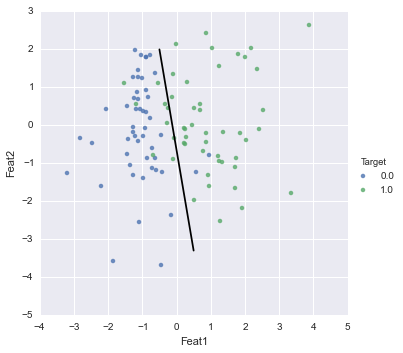

In [8]:
# graph the decision boundary 
x = np.linspace(-0.5, 0.5, 10)
theta1 = model1.coeffs

sns.lmplot(x="Feat1", y="Feat2", hue="Target", data=data1, fit_reg= False, markers='o')
plt.plot(x,(theta1[1]*x + theta1[0])/(-theta1[2]), c = 'black');

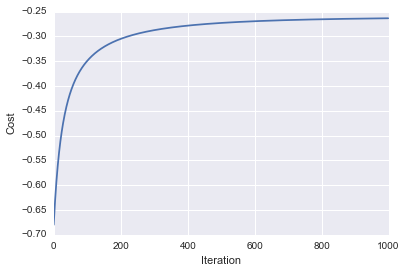

In [9]:
# Check if your model reached convergence
plt.plot(xrange(len(model1.costs_ascent)), model1.costs_ascent)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# DATA with Intercept

In [10]:
data2 = pd.read_csv("data/data1.txt", header = None, names = ["X1", "X2", "y"] )
data2.head()

,X1,X2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


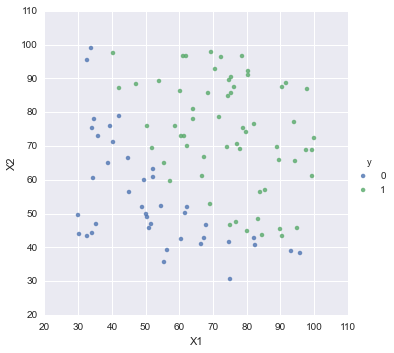

In [11]:
sns.lmplot(x="X1", y="X2", hue="y", data=data2, fit_reg= False, markers='o');

In [12]:
# Instantiate and run model on data
model2 = GradientAscent(cost, gradient, predict_func, fit_intercept = True, scale = True)
X2 = data2.ix[:,:-1]
y2 = data2.ix[:,-1]
model2.run(X2, y2, alpha=1, num_iterations=100, L2_reg = 0)

# model predictions
y2_pred = model2.predict(X2)

print "*******************************"
print "Accuracy: ", accuracy(y2,y2_pred)
print "Precision: ", precision(y2,y2_pred)
print "Recall:", recall(y2,y2_pred)

Starting Gradient Ascent with theta = [ 0.  0.  0.] and cost = -0.69314718056
Running...
After 100 iterations: theta = [ 1.27441976  3.06948797  2.83238804] and cost = -0.210423494834
*******************************
Accuracy:  0.89
Precision:  0.901639344262
Recall: 0.916666666667


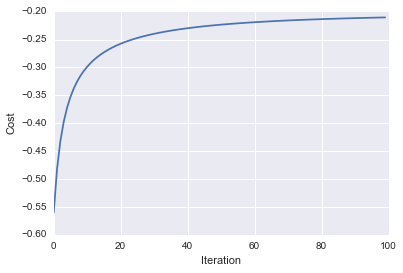

In [13]:
# Check if your model reached convergence
plt.plot(xrange(len(model2.costs_ascent)), model2.costs_ascent)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [14]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    sns.set_style(style='white')
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)

In [15]:
# Plot the decision boundary
y2_scaled = model2.scale_transform(y2)
plot_decision_boundary(lambda x: model2.predict(x), X2, y2_scaled)
plt.title("Decision Boundary for ...");

TypeError: unhashable type

In [ ]:
degree = 6
Xpol = np.ones((X.shape[0], degree))
print Xpol[:3,:]
for i in range(degree):
    for j in range(0, i+1):
        Xpol[:,i] = X[:,0]**(i-j) * X[:,1]**(j)
Xpol[:3,:]

In [ ]:
data2 = pd.read_csv("data/data2.txt", header = None, names = ["X1", "X2", "y"] )
data2.head()

In [ ]:
sns.lmplot(x="X1", y="X2", hue="y", data=data2, fit_reg= False, markers='o');

In [ ]:
# save cost, gradient and prediction functions
#cost = log_likelihood
#gradient = log_likelihood_gradient
cost = reg_log_likelihood
gradient = reg_log_likelihood_gradient
predict_func = predict

In [ ]:
X = data1.ix[:,:-1].values
degree = 6
Xpol = np.ones((X.shape[0], degree))
print Xpol[:3,:]
for i in range(degree):
    for j in range(0, i+1):
        Xpol[:,i] = X[:,0]**(i-j) * X[:,1]**(j)
Xpol[:3,:]

In [ ]:
# Instantiate and run model on data
model = GradientAscent(cost, gradient, predict_func)

y = data1.ix[:,-1]
model.run(Xpol, y, alpha=0.0001, num_iterations=100, reg = 10)

# model predictions
y_pred = model.predict(Xpol)

print "*******************************"
print "Accuracy: ", accuracy(y,y_pred)
print "Precision: ", precision(y,y_pred)
print "Recall:", recall(y,y_pred)

In [ ]:
X = np.array([[1,2],[2,3],[4,7]])
X